### 크롤링 순서

#### 1. 지역 검색 

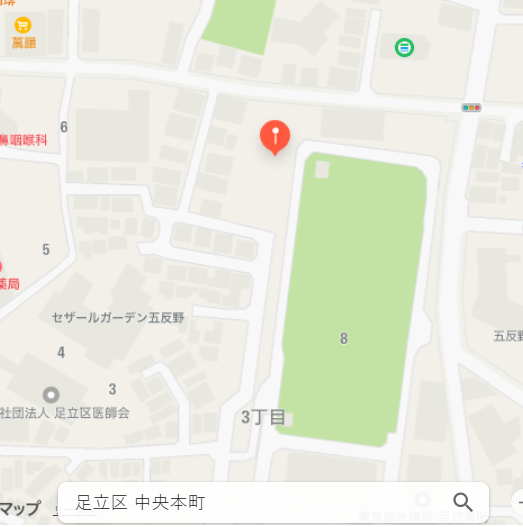

#### 2. 인터넷 창 축소 - fire 객체 불러오기 위해
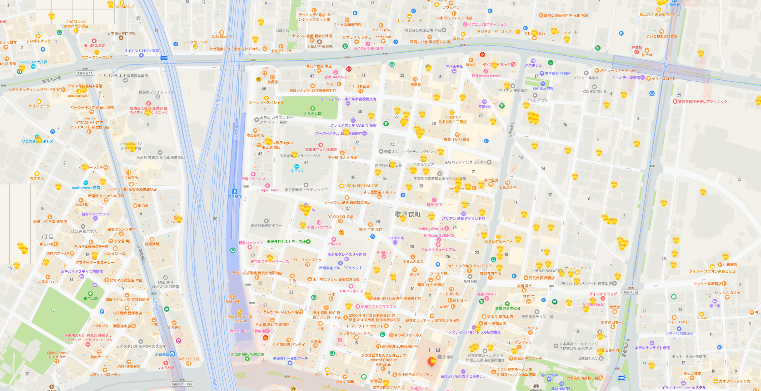

#### 5. fire 객체 클릭  - 데이터 수집
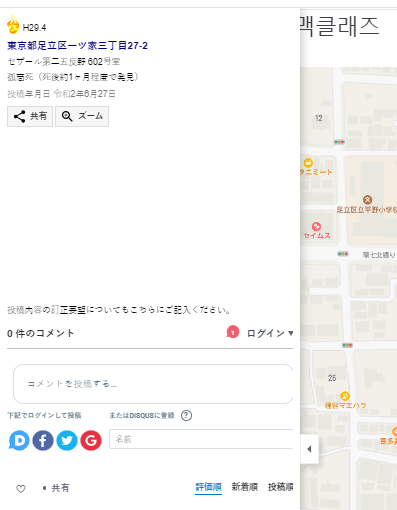
 

### 도쿄 부동산 사건 데이터 수집 
출처 :  <a href = 'http://www.oshimaland.co.jp'> 오시마랜드 </a>

사이트 정보 : 본 웹사이트는 자살사건, 시체유기사건, 살인사건 등 과거에 불미스러운 사건이 있었던 건물을 모아서 보여줍니다.

도쿄 23구와 다마 지역 (26개의 도시) 데이터 수집 할 예정이다 

특별도 각 구청 : https://good-luck-day.com/tokyo-district-list/
```
도쿄 23구 

    가쓰시카구(葛飾区)
    고토구(江東区)
    기타구(北区)
    나카노구(中野区)
    네리마구(練馬区)
    다이토구(台東区)
    도시마구(豊島区)
    미나토구(港区)
    메구로구(目黒区)
    스미다구(墨田区)
    스기나미구(杉竝区)
    신주쿠구(新宿区)
    세타가야구(世田谷区)
    시나가와구(品川区)
    시부야구(渋谷区)
    아다치구(足立区)
    아라카와구(荒川区)
    에도가와구(江戸川区)
    이타바시구(板橋区)
    오타구(大田区)
    분쿄구(文京区)
    주오구(中央区)
    지요다구(千代田区)

다마 지역

    고가네이시(小金井市)
    고다이라시(小平市)
    고마에시(狛江市)
    고쿠분지시(国分寺市)
    구니타치시(国立市)
    기요세시(清瀬市)
    니시토쿄시(西東京市)
    다마시(多摩市)
    다치카와시(立川市)
    마치다시(町田市)
    무사시노시(武藏野市)
    무사시무라야마시(武藏村山市)
    미타카시(三鷹市)
    아키루노시(あきる野市)
    아키시마시(昭島市)
    오메시(青梅市)
    이나기시(稲城市)
    조후시(調布市)
    하무라시(羽村市)
    하치오지시(八王子市)
    후추시(府中市)
    훗사시(福生市)
    히가시무라야마시(東村山市)
    히가시야마토시(東大和市)
    히가시쿠루메시(東久留米市)
    히노시(日野市)

```




In [5]:
!pip install webdriver-manager
!pip install requests

In [30]:
import pandas as pd
import numpy as np 

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import time

In [37]:
#1. oshimaland 웹사이트 불러오기
def loadWeb(driver, url):
    
    # 화면 최대 크기 설정 
    driver.maximize_window()
    driver.get(url)
    #모든 창이 로딩 될떄까지 기다려 줌 
    time.sleep(3)
    #팝업창 화면 전환 후 닫아주기
    multi_window = driver.window_handles
    if(len(multi_window)>1):
        driver.switch_to.window(driver.window_handles[-1])
        driver.close()
        time.sleep(3)
        # 접근 페이지 다시 요청
        driver.switch_to.window(driver.window_handles[-1])
        driver.get(url)
    
    # 전체 지도 축소 
    driver.execute_script("document.body.style.zoom='25%'")
    time.sleep(5)




### 지도 전체 축소를 이용한 방법
#### 1. 크롬 창을 25% 정도로  축소 
#### 2. 크롬창을 축소하면 fire 객체를 여러번 누를필요가 없어짐
#### 3. 지도상 모든 fire 객체 수집
#### 4. 동적으로 클릭하여 정보가져오기  

-------

- #### 생각해야 할 점 
##### 예를들어 신주쿠 검색시 25% 지도 축소를 진행해도 전체 신주쿠시가 지도내에 포함이 안되면 데이터 소실 문제 발생 

In [70]:
def get_fire(driver): # 미완성 - 실행은 안해본 코드  
    # fire 객체 수집 
    fire_object_list = driver.find_element(By.CSS_SELECTOR, '#map-canvas > div.mk-map-view.mk-disable-all-gestures > div > div.mk-annotation-container')
    fire_list = fire_object_list.select_element(By.CSS_SELECTOR, '.map-fire')
    print(len(fire_list))

    

In [69]:
def search_fire(driver, jp_district_list):
    for district in jp_district_list:
        region_search_tab = driver.find_element(By.CSS_SELECTOR, '#geocoder-text')
        # serach = region_list[0]+region_list[i]
        # 검색어 clear
        region_search_tab.clear()
        # 지역 검색
        region_search_tab.send_keys(district)
        time.sleep(2)
        # 검색 버튼 클릭 
        search_btn = driver.find_element(By.ID, "geocoder-button")
        search_btn.click()
        time.sleep(2)
        # fire 객체 정보 수집 
        get_fire(driver)





In [42]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
                                              0.0/55.1 kB ? eta -:--:--
     -------------------------------------    51.2/55.1 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 55.1/55.1 kB 954.5 kB/s eta 0:00:00
                                              0.0/1.5 MB ? eta -:--:--
     -----                                    0.2/1.5 MB 4.1 MB/s eta 0:00:01
     --------                                 0.3/1.5 MB 2.8 MB/s eta 0:00:01
     ------------                             0.5/1.5 MB 3.0 MB/s eta 0:00:01
     ---------------                          0.6/1.5 MB 2.8 MB/s eta 0:00:01
     -----------------                        0.7/1.5 MB 2.7 MB/s eta 0:00:01
     ------------------                       0.7/1.5 MB 2.6 MB/s eta 0:00:01
     --------------------                     0.8/1.5 MB 2.4 MB/s eta 0:00:01
     ----------------------                   0.9

#### 영어로된 일본 지역 리스트 본어로 전처리 
- 오시마랜드는 영오도 지원되나 일본어로 검색하는게 정확도가 높다 판단하여 일본어로 변경해준다 
- googletrans를 이용해 번역할 경우 정확도가 떨어진다
- 45개 지역 하드코딩으로 번역

In [63]:
from googletrans import Translator

main_district = pd.read_csv('../jieun/main_district_df2.csv')
district_list  = main_district['neighbourhood_cleansed'].values
translator = Translator()
jp_district_list = list(map(lambda district: translator.translate(district, src='en', dest='ja').text.replace(' ',''),district_list))
jp_district_list[: 10]


['シンジュク・クー',
 'TaitoKu',
 'スミダ・クー',
 'トシマク',
 '渋谷ku',
 '港Ku',
 'SetagayaKu',
 'OtaKu',
 '中野ku',
 'チュオク']

In [67]:
jp_district_list = [
    '新宿区', '台東区', '墨田区', '豊島区', '渋谷区',
    '港区', '世田谷区', '大田区', '中野区', '中央区',
    '北区', '葛飾区', '杉並区', '江東区', '江戸川区',
    '文京区', '荒川区', '板橋区', '品川区', '千代田区',
    '足立区', '目黒区', '練馬区', '府中市', '八王子市',
    '日野市', '国分寺市', '町田市', '青梅市', '調布市',
    '武蔵野市', 'あきる野市', '三鷹市', '小金井市', '東村山市',
    '多摩市', '国立市', '狛江市', '西東京市', '立川市',
    '小平市', '羽村市', '武蔵村山市', '奥多摩町', '昭島市',
    '福生市'
]

In [38]:
url = 'https://www.oshimaland.co.jp/'
chrome_option = webdriver.ChromeOptions()
driver = webdriver.Chrome(ChromeDriverManager().install(), options=chrome_option)
loadWeb(driver, url)

In [ ]:
search_fire(driver, jp_district_list )

#### 지도 내 줌인 줌아웃 실패 

In [297]:
# from selenium.webdriver.common.action_chains import ActionChains
# # https://stackoverflow.com/questions/64474653/how-to-webscrape-a-canvas-element-with-python-selenium
# canvas = driver.find_element(By.CSS_SELECTOR, '#map-canvas > div.mk-map-view.mk-disable-all-gestures > canvas.rt-root')
# action = ActionChains(driver)

# map_canvas = driver.find_element_by_css_selector("div.mk-map-view > canvas.rt-root")

# from selenium.webdriver.common.action_chains import ActionChains

# # 지도 요소 위에서 마우스를 움직임
# actions = ActionChains(driver)
# actions.move_to_element(map_canvas).click().perform()

# actions.move_by_offset(0, 200).perform() # 줌인만 가능 

# #줌인 줌아웃 반복 
# action.move_to_element(canvas).move_by_offset(0, 0).click_and_hold().perform()
# action.move_by_offset(-200,0).release().perform()

#### Request API 이용한 방법 

In [8]:
import json
from  bs4 import BeautifulSoup
from urllib.request import Request, urlopen

In [10]:

json_url = 'https://www.oshimaland.co.jp/d/3q5znamu.json'
response = Request(json_url, headers={"User-Agent": "Mozilla/5.0"})
response = urlopen(url)
soup = BeautifulSoup(response, 'html.parser')
json_data = json_data = json.loads(soup.text)

json_data

{'key': '3q5znamu',
 'lat': 35.693886004366256,
 'lng': 139.70346762941995,
 'info': '飛び降り自殺',
 'ad': '東京都新宿区歌舞伎町一丁目4',
 'dt': '令和2年7月10日',
 'cr': '令和4年3月7日',
 'images': [],
 'links': []}